<a href="https://colab.research.google.com/github/Rishi-Kora/Cafe-Sales-Data-Analysis/blob/main/Cafe_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the neceesary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore

Loading the dataset

In [4]:
file_path = "/content/drive/MyDrive/Colab Notebooks/data/dirty_cafe_sales.csv"
df = pd.read_csv(file_path)
print(df)

     Transaction ID      Item Quantity Price Per Unit Total Spent  \
0       TXN_1961373    Coffee        2            2.0         4.0   
1       TXN_4977031      Cake        4            3.0        12.0   
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
4       TXN_3160411    Coffee        2            2.0         4.0   
...             ...       ...      ...            ...         ...   
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       2023-05-16  
2        Credit Card 

In [5]:
df.replace({'ERROR': None}, inplace=True)

In [6]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [7]:
df['Payment Method'] = df['Payment Method'].str.strip().str.lower().replace({
    'creditcard': 'credit card',
    'credit_card': 'credit card',
    'cash ': 'cash',
    'UNKNOWN': 'Unknown'
})
df['Location'] = df['Location'].str.strip().str.lower().replace({
    'in store': 'in-store',
    'take away': 'takeaway',
    'UNKNOWN': 'Unknown'
})

In [8]:
df['Payment Method'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)

<ipython-input-8-d64a84a0307a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna('Unknown', inplace=True)
<ipython-input-8-d64a84a0307a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [9]:
df_cleaned = df.dropna(subset=['Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Date'])
print(df_cleaned)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
3       TXN_7034554     Salad       2.0             5.0         10.0   
4       TXN_3160411    Coffee       2.0             2.0          4.0   
5       TXN_2602893  Smoothie       5.0             4.0         20.0   
...             ...       ...       ...             ...          ...   
9992    TXN_2739140  Smoothie       4.0             4.0         16.0   
9994    TXN_7851634   UNKNOWN       4.0             4.0         16.0   
9995    TXN_7672686    Coffee       2.0             2.0          4.0   
9997    TXN_5255387    Coffee       4.0             2.0          8.0   
9999    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        credit card  takeaway       2023-09-08  
1               cash  in-store     

Standardizing the dataset

In [10]:
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']] = scaler.fit_transform(df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']])
print(df_cleaned)
df_cleaned[['Quantity_normalized', 'Price_Per_Unit_normalized', 'Total_Spent_normalized']] = minmax_scaler.fit_transform(df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']])
print(df_cleaned)
df_cleaned[['Quantity_zscore', 'Price_Per_Unit_zscore', 'Total_Spent_score']] = df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']].apply(lambda x: zscore(x, nan_policy='omit'))
print(df_cleaned)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee -0.716601       -0.742105    -0.817513   
1       TXN_4977031      Cake  0.693384        0.041419     0.517604   
3       TXN_7034554     Salad -0.716601        1.608467     0.183825   
4       TXN_3160411    Coffee -0.716601       -0.742105    -0.817513   
5       TXN_2602893  Smoothie  1.398377        0.824943     1.852721   
...             ...       ...       ...             ...          ...   
9992    TXN_2739140  Smoothie  0.693384        0.824943     1.185163   
9994    TXN_7851634   UNKNOWN  0.693384        0.824943     1.185163   
9995    TXN_7672686    Coffee -0.716601       -0.742105    -0.817513   
9997    TXN_5255387    Coffee  0.693384       -0.742105    -0.149954   
9999    TXN_6170729  Sandwich -0.011609        0.824943     0.517604   

      Payment Method  Location Transaction Date  
0        credit card  takeaway       2023-09-08  
1               cash  in-store     

<ipython-input-10-dae98bbea4eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']] = scaler.fit_transform(df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']])
<ipython-input-10-dae98bbea4eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Quantity_normalized', 'Price_Per_Unit_normalized', 'Total_Spent_normalized']] = minmax_scaler.fit_transform(df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']])
<ipython-input-10-dae98bbea4eb

Calculating the IQR

In [11]:
def compute_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    return (col - Q1) / IQR if IQR != 0 else col
df_cleaned[['Quantity_iqr', 'Price_Per_Unit_iqr', 'Total_Spent_iqr']] = df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']].apply(lambda col: compute_iqr(col))
print(df_cleaned)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee -0.716601       -0.742105    -0.817513   
1       TXN_4977031      Cake  0.693384        0.041419     0.517604   
3       TXN_7034554     Salad -0.716601        1.608467     0.183825   
4       TXN_3160411    Coffee -0.716601       -0.742105    -0.817513   
5       TXN_2602893  Smoothie  1.398377        0.824943     1.852721   
...             ...       ...       ...             ...          ...   
9992    TXN_2739140  Smoothie  0.693384        0.824943     1.185163   
9994    TXN_7851634   UNKNOWN  0.693384        0.824943     1.185163   
9995    TXN_7672686    Coffee -0.716601       -0.742105    -0.817513   
9997    TXN_5255387    Coffee  0.693384       -0.742105    -0.149954   
9999    TXN_6170729  Sandwich -0.011609        0.824943     0.517604   

      Payment Method  Location Transaction Date  Quantity_normalized  \
0        credit card  takeaway       2023-09-08                

<ipython-input-11-d7cd79b6718e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Quantity_iqr', 'Price_Per_Unit_iqr', 'Total_Spent_iqr']] = df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']].apply(lambda col: compute_iqr(col))
<ipython-input-11-d7cd79b6718e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Quantity_iqr', 'Price_Per_Unit_iqr', 'Total_Spent_iqr']] = df_cleaned[['Quantity', 'Price Per Unit', 'Total Spent']].apply(lambda col: compute_iqr(col))
<ipython-input-11-

Describing the dataset

In [12]:
print("Summary Statistics:\n", df_cleaned.describe())

Summary Statistics:
            Quantity  Price Per Unit   Total Spent  \
count  7.652000e+03    7.652000e+03  7.652000e+03   
mean   3.342857e-17   -2.600000e-17  1.318571e-16   
min   -1.421594e+00   -1.525630e+00 -1.318182e+00   
25%   -7.166012e-01   -7.421055e-01 -8.175127e-01   
50%   -1.160861e-02    4.141865e-02 -1.499542e-01   
75%    6.933840e-01    8.249428e-01  5.176043e-01   
max    1.398377e+00    1.608467e+00  2.687169e+00   
std    1.000065e+00    1.000065e+00  1.000065e+00   

                    Transaction Date  Quantity_normalized  \
count                           7652          7652.000000   
mean   2023-07-02 08:18:52.880292608             0.504117   
min              2023-01-01 00:00:00             0.000000   
25%              2023-04-02 00:00:00             0.250000   
50%              2023-07-03 00:00:00             0.500000   
75%              2023-10-01 06:00:00             0.750000   
max              2023-12-31 00:00:00             1.000000   
std          

Checking whether the dataset contains null values

In [13]:
print("Missing Values:\n", df_cleaned.isnull().sum())

Missing Values:
 Transaction ID               0
Item                         0
Quantity                     0
Price Per Unit               0
Total Spent                  0
Payment Method               0
Location                     0
Transaction Date             0
Quantity_normalized          0
Price_Per_Unit_normalized    0
Total_Spent_normalized       0
Quantity_zscore              0
Price_Per_Unit_zscore        0
Total_Spent_score            0
Quantity_iqr                 0
Price_Per_Unit_iqr           0
Total_Spent_iqr              0
dtype: int64


Plotting the graph

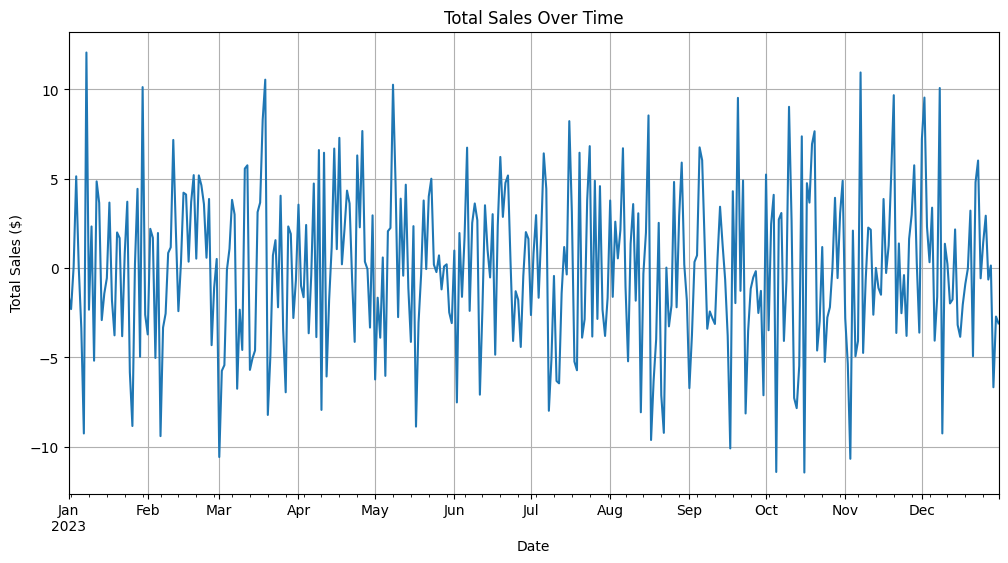

In [14]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby('Transaction Date')['Total Spent'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid()
plt.show()

<ipython-input-15-71c9470fd32b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['Item'], order=df_cleaned['Item'].value_counts().index, palette='viridis')


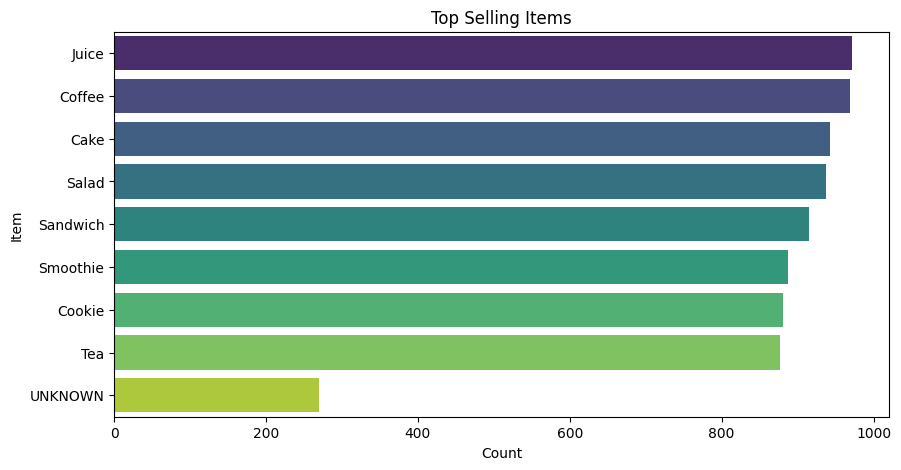

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df_cleaned['Item'], order=df_cleaned['Item'].value_counts().index, palette='viridis')
plt.title("Top Selling Items")
plt.xlabel("Count")
plt.ylabel("Item")
plt.show()

<ipython-input-16-6207a56081a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['Payment Method'], order=df_cleaned['Payment Method'].value_counts().index, palette='coolwarm')


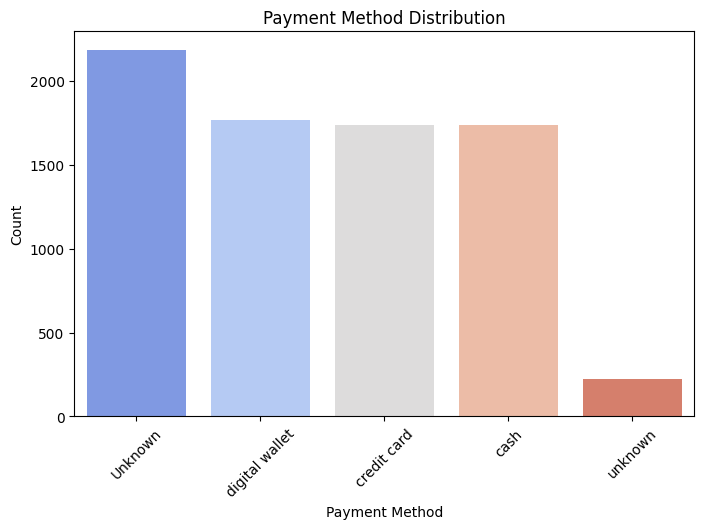

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_cleaned['Payment Method'], order=df_cleaned['Payment Method'].value_counts().index, palette='coolwarm')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()